In [59]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import tqdm

In [73]:
base_df = pd.read_csv("../data/output_files/final_base_df.csv")

In [105]:
varient_list = list(set(base_df["varient"]))

In [ ]:
changed_peptides = []
for i, row in tqdm.tqdm(base_df.iterrows(), total=len(base_df)):
    try:
        tmp = list(base_df[(base_df["varient"] == "original")&(base_df["start_pos"] == row["start_pos"])&(base_df["end_pos"] == row["end_pos"])]["peptide"])[0]
    except:
        print("no peptide")
        tmp = ""
    if(row["peptide"] != tmp):
        changed_peptides.append(row["peptide"])
        changed_peptides.append(tmp)
print(changed_peptides) 

In [153]:
filtered_df = base_df[base_df.peptide.isin(changed_peptides)]
display(filtered_df)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,peptide,start_pos,end_pos,varient,Chopped,HLA-A*26:01_rank,HLA-B*40:01_rank,...,HLA-B*15:01_rank,HLA-A*01:01_rank,HLA-A*02:01_rank,HLA-B*07:02_rank,HLA-B*27:05_rank,HLA-A*24:02_rank,HLA-B*58:01_rank,HLA-B*08:01_rank,HLA-A*03:01_rank,Potential
0,0,0,0,MFVFLVLL,1,8,Alpha B.1.1.7,True,46.250,44.0,...,61.250,68.333,21.618,24.484,38.000,8.903,40.500,14.162,55.714,0.0
1,1,1,1,MFVFLVLL,1,8,Beta B.1.351,True,46.250,44.0,...,61.250,68.333,21.618,24.484,38.000,8.903,40.500,14.162,55.714,0.0
2,2,2,2,MFVFLVLL,1,8,Gamma P.1,True,46.250,44.0,...,61.250,68.333,21.618,24.484,38.000,8.903,40.500,14.162,55.714,0.0
3,3,3,3,MFVFLVLL,1,8,Kappa B.1.617.1,True,46.250,44.0,...,61.250,68.333,21.618,24.484,38.000,8.903,40.500,14.162,55.714,0.0
4,4,4,4,MFVFLVLL,1,8,Delta B.1.617.2,True,46.250,44.0,...,61.250,68.333,21.618,24.484,38.000,8.903,40.500,14.162,55.714,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53080,53080,53080,53080,FVFLFLLPLV,2,11,Iota B.1.526,False,22.789,49.0,...,47.800,50.968,4.153,73.750,44.667,31.667,57.333,41.278,32.444,0.0
53081,53081,53081,53081,VFLFLLPLVS,3,12,Iota B.1.526,False,77.500,85.0,...,39.600,70.000,15.627,75.000,61.000,32.800,74.286,64.091,31.300,0.0
53082,53082,53082,53082,FLFLLPLVSS,4,13,Iota B.1.526,False,55.714,75.0,...,32.150,64.524,4.385,59.444,55.000,45.500,71.429,34.939,25.381,0.0
53083,53083,53083,53083,LFLLPLVSSQ,5,14,Iota B.1.526,False,53.182,85.0,...,24.360,60.476,26.211,58.333,51.111,36.000,52.857,53.293,17.580,0.0


# Chopped analysis

number of chopped by varient

In [148]:
varient_chopped_counter = {}
for varient in varient_list:
    chopped_counter = len(filtered_df[(filtered_df["varient"] == varient )&(filtered_df["Chopped"] == True)])
    not_chopped_counter = len(filtered_df[(filtered_df["varient"] == varient) & (filtered_df["Chopped"] == False)])
    varient_chopped_counter[varient] = {"chopped":chopped_counter, "not chopped":not_chopped_counter}

print(varient_chopped_counter)

{'AY.4.2': {'chopped': 53, 'not chopped': 160}, 'Omicron BA.1': {'chopped': 53, 'not chopped': 160}, 'C.1.2': {'chopped': 50, 'not chopped': 163}, 'Gamma P.1': {'chopped': 53, 'not chopped': 160}, 'Eta B.1.525': {'chopped': 50, 'not chopped': 163}, 'Lambda C.37': {'chopped': 48, 'not chopped': 165}, 'Kappa B.1.617.1': {'chopped': 53, 'not chopped': 160}, 'Delta B.1.617.2': {'chopped': 53, 'not chopped': 160}, 'Omicron BA.2': {'chopped': 50, 'not chopped': 163}, 'Beta B.1.351': {'chopped': 50, 'not chopped': 163}, 'Alpha B.1.1.7': {'chopped': 55, 'not chopped': 158}, 'Iota B.1.526': {'chopped': 50, 'not chopped': 163}, 'original': {'chopped': 54, 'not chopped': 159}, 'Mu B.1.621': {'chopped': 50, 'not chopped': 163}}


In [149]:
cols = ["varient", "Chopped?","count" ]
rows = []
for var in varient_chopped_counter:
    rows.append([var, True, varient_chopped_counter[var]["chopped"]])
    rows.append([var, False, varient_chopped_counter[var]["not chopped"]])
chopped_counter_df = pd.DataFrame(rows, columns=cols)

% of chopped by original

In [150]:
cols = ["varient", "Chopped?","count" ]
rows = []

original_chopped_counter = varient_chopped_counter["original"]["chopped"]
original_not_chopped_counter = varient_chopped_counter["original"]["not chopped"]

for var in varient_chopped_counter:
    chopped_counter = varient_chopped_counter[var]["chopped"]
    not_chopped_counter = varient_chopped_counter[var]["not chopped"]
    rows.append([var, True, 100*(chopped_counter/original_chopped_counter)-100])
    rows.append([var, False,100*not_chopped_counter/original_not_chopped_counter-100])
chopped_counter_df = pd.DataFrame(rows, columns=cols)

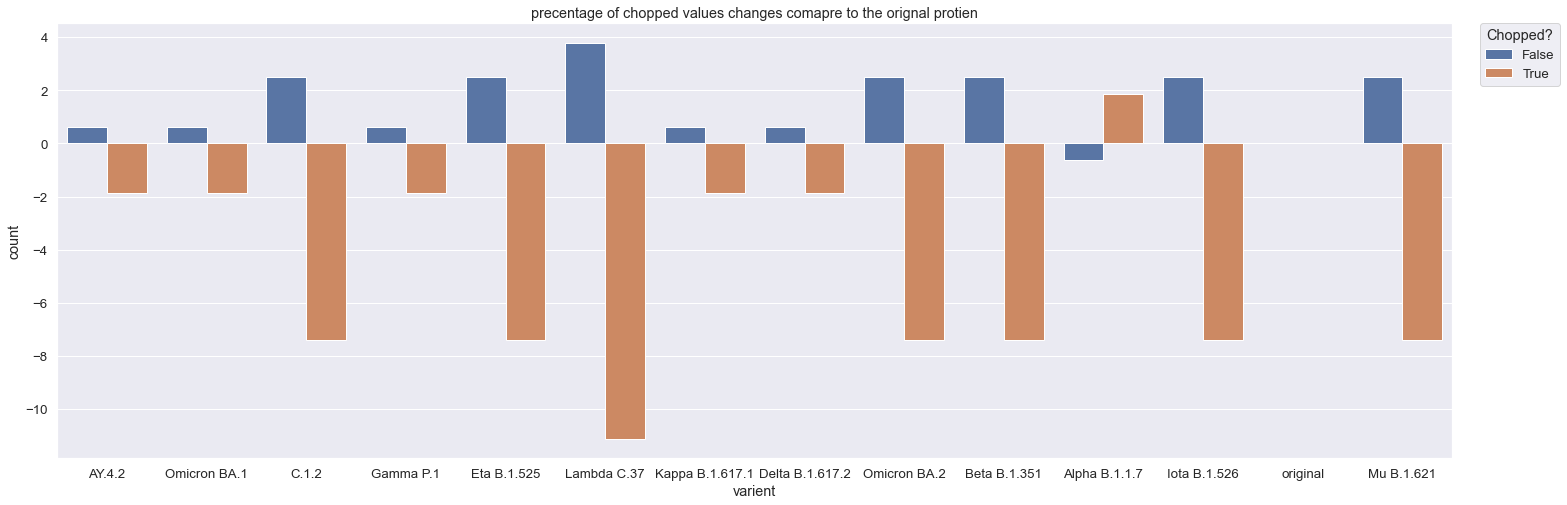

In [152]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(25,8)})
sns.set(font_scale = 1.2)
ax = sns.barplot(x="varient", y="count", hue="Chopped?", data=chopped_counter_df)

ax.set_title('precentage of chopped values changes comapre to the orignal protien')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Chopped?")
plt.savefig("plots/chopped-varient.png", dpi=500, bbox_inches='tight')


# bro

In [143]:
varient_chopped_counter = {}
for varient in varient_list:
    chopped_counter = len(filtered_df[(filtered_df["varient"] == varient )&(filtered_df["Potential"] > 0)])
    not_chopped_counter = len(filtered_df[(filtered_df["varient"] == varient) & (filtered_df["Potential"] == 0)])
    varient_chopped_counter[varient] = {"chopped":chopped_counter, "not chopped":not_chopped_counter}

print(varient_chopped_counter)

{'AY.4.2': {'chopped': 43, 'not chopped': 170}, 'Omicron BA.1': {'chopped': 43, 'not chopped': 170}, 'C.1.2': {'chopped': 43, 'not chopped': 170}, 'Gamma P.1': {'chopped': 25, 'not chopped': 188}, 'Eta B.1.525': {'chopped': 43, 'not chopped': 170}, 'Lambda C.37': {'chopped': 61, 'not chopped': 152}, 'Kappa B.1.617.1': {'chopped': 43, 'not chopped': 170}, 'Delta B.1.617.2': {'chopped': 43, 'not chopped': 170}, 'Omicron BA.2': {'chopped': 43, 'not chopped': 170}, 'Beta B.1.351': {'chopped': 43, 'not chopped': 170}, 'Alpha B.1.1.7': {'chopped': 45, 'not chopped': 168}, 'Iota B.1.526': {'chopped': 43, 'not chopped': 170}, 'original': {'chopped': 43, 'not chopped': 170}, 'Mu B.1.621': {'chopped': 43, 'not chopped': 170}}


In [144]:
cols = ["varient", "Chopped?","count" ]
rows = []
for var in varient_chopped_counter:
    rows.append([var, True, varient_chopped_counter[var]["chopped"]])
    rows.append([var, False, varient_chopped_counter[var]["not chopped"]])
chopped_counter_df = pd.DataFrame(rows, columns=cols)

% of chopped by original

In [145]:
cols = ["varient", "Chopped?","count" ]
rows = []

original_chopped_counter = varient_chopped_counter["original"]["chopped"]
original_not_chopped_counter = varient_chopped_counter["original"]["not chopped"]

for var in varient_chopped_counter:
    chopped_counter = varient_chopped_counter[var]["chopped"]
    not_chopped_counter = varient_chopped_counter[var]["not chopped"]
    rows.append([var, True, 100*(chopped_counter/original_chopped_counter)-100])
    rows.append([var, False,100*not_chopped_counter/original_not_chopped_counter-100])
chopped_counter_df = pd.DataFrame(rows, columns=cols)

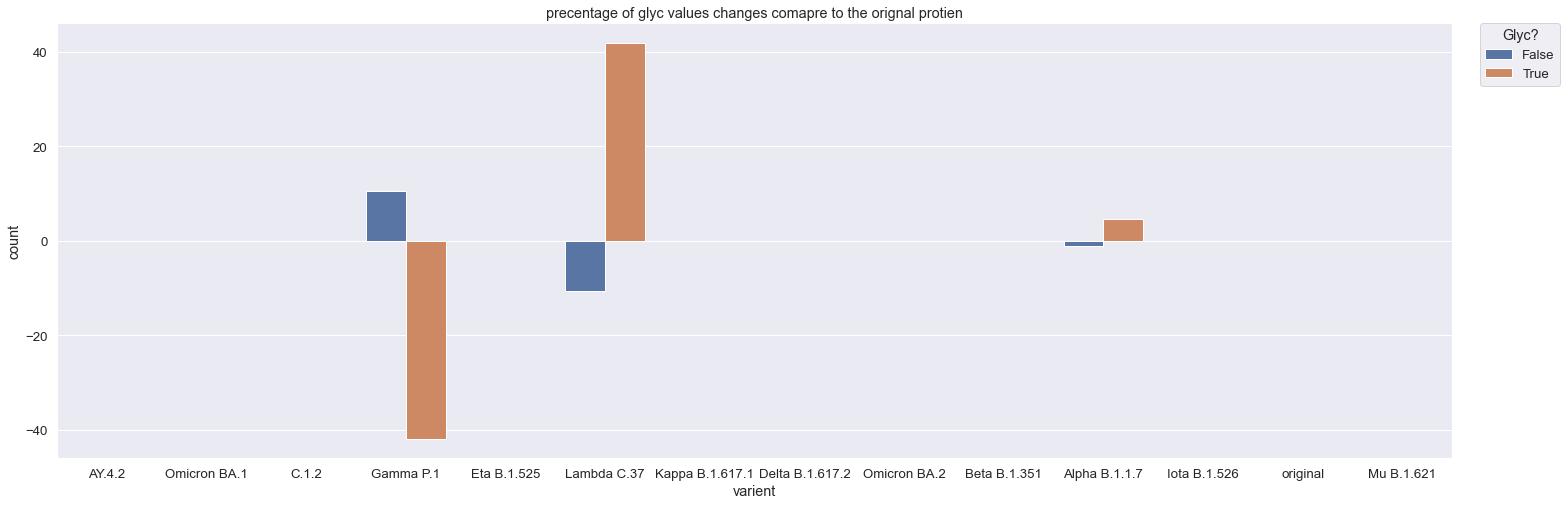

In [147]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(25,8)})
sns.set(font_scale = 1.2)
ax = sns.barplot(x="varient", y="count", hue="Chopped?", data=chopped_counter_df)

ax.set_title('precentage of glyc values changes comapre to the orignal protien')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Glyc?")
plt.savefig("plots/glyc-varient.png", dpi=500, bbox_inches='tight')


# NetMHCPan anlysis

boxplor ranks mean

In [158]:
MHC_TYPES = [i for i in list(set(filtered_df.columns)) if i.startswith("H")]


In [175]:
new_list = []
for i, row in filtered_df.iterrows():
    tmp_list = []
    for mhc_type in MHC_TYPES:
        #tmp_list.append(row[mhc_type])    
        new_list.append([row[mhc_type], row["varient"]])


cols = ["rank", "varient"]
box_df = pd.DataFrame(new_list, columns=cols)
binders_df = box_df[box_df["rank"] <=2]
display(box_df)
display(binders_df)

,rank,varient
0,21.618,Alpha B.1.1.7
1,46.250,Alpha B.1.1.7
2,40.500,Alpha B.1.1.7
3,14.162,Alpha B.1.1.7
4,61.250,Alpha B.1.1.7
...,...,...
35779,55.000,Iota B.1.526
35780,46.333,Iota B.1.526
35781,48.000,Iota B.1.526
35782,41.083,Iota B.1.526


,rank,varient
468,1.483,Alpha B.1.1.7
480,1.483,Beta B.1.351
492,1.483,Gamma P.1
504,1.483,Kappa B.1.617.1
516,1.483,Delta B.1.617.2
...,...,...
35510,1.159,Eta B.1.525
35522,1.716,Eta B.1.525
35524,1.823,Eta B.1.525
35556,0.574,Eta B.1.525


C:\Users\itayb\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:2805: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


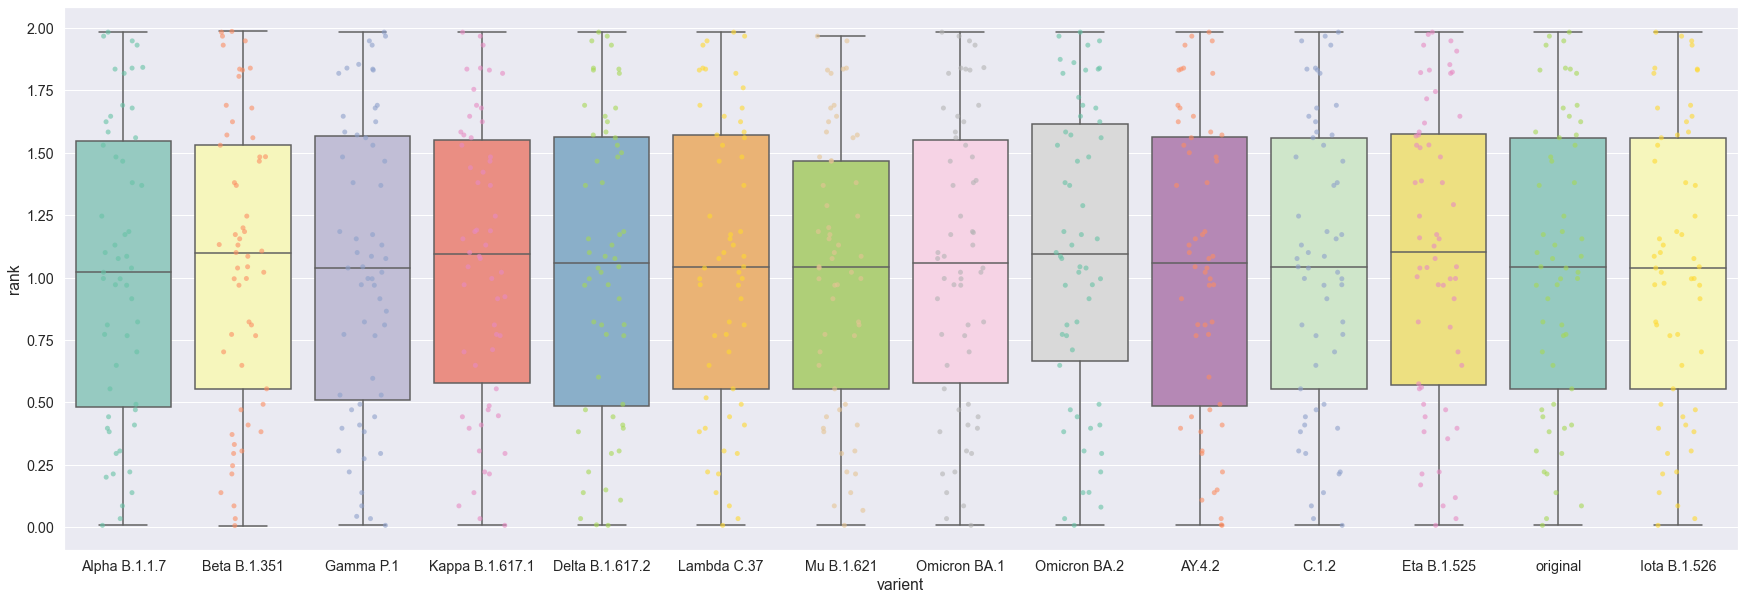

In [176]:
labels = varient_list

sns.set_theme(style="whitegrid")

sns.set(font_scale = 1.3)
plt.figure(figsize = (30,10))

ax = sns.boxplot(x="varient", y="rank",
                 data=binders_df, palette="Set3")

ax = sns.stripplot(x="varient", y="rank",  data=binders_df, ax=ax, palette="Set2", split=True, jitter=0.2, alpha=0.6)

plt.savefig("plots/chopped-rank-boxplot", dpi=500, bbox_inches='tight')

binders change

In [179]:
varient_binders_dict = {}
for var in varient_list:
    varient_binders_dict[var] = {"strong": len(box_df[(box_df["varient"] == var) & (box_df["rank"] <=0.5)]), "weak":len(box_df[(box_df["varient"] == var) & ((box_df["rank"] >0.5) & (box_df["rank"] <=2))]), "non":len(box_df[(box_df["varient"] == var) & (box_df["rank"] >2)])}

print(varient_binders_dict)

{'AY.4.2': {'strong': 15, 'weak': 41, 'non': 2500}, 'Omicron BA.1': {'strong': 14, 'weak': 44, 'non': 2498}, 'C.1.2': {'strong': 14, 'weak': 43, 'non': 2499}, 'Gamma P.1': {'strong': 15, 'weak': 44, 'non': 2497}, 'Eta B.1.525': {'strong': 13, 'weak': 47, 'non': 2496}, 'Lambda C.37': {'strong': 13, 'weak': 44, 'non': 2499}, 'Kappa B.1.617.1': {'strong': 14, 'weak': 44, 'non': 2498}, 'Delta B.1.617.2': {'strong': 15, 'weak': 41, 'non': 2500}, 'Omicron BA.2': {'strong': 14, 'weak': 44, 'non': 2498}, 'Beta B.1.351': {'strong': 14, 'weak': 43, 'non': 2499}, 'Alpha B.1.1.7': {'strong': 15, 'weak': 40, 'non': 2501}, 'Iota B.1.526': {'strong': 14, 'weak': 43, 'non': 2499}, 'original': {'strong': 14, 'weak': 43, 'non': 2499}, 'Mu B.1.621': {'strong': 14, 'weak': 43, 'non': 2499}}


In [180]:
cols = ["varient", "Chopped?","count" ]
rows = []
for var in varient_binders_dict:
    rows.append([var, "strong", varient_binders_dict[var]["strong"]])
    rows.append([var, "weak", varient_binders_dict[var]["weak"]])
    rows.append([var, "non", varient_binders_dict[var]["non"]])
chopped_counter_df = pd.DataFrame(rows, columns=cols)

% of chopped by original

In [182]:
cols = ["varient", "Chopped?","count" ]
rows = []

original_chopped_counter = varient_binders_dict["original"]["strong"]
original_not_chopped_counter = varient_binders_dict["original"]["weak"]
original_non_chopped_counter = varient_binders_dict["original"]["non"]
for var in varient_binders_dict:
    chopped_counter = varient_binders_dict[var]["strong"]
    not_chopped_counter = varient_binders_dict[var]["weak"]
    non_chopped_counter = varient_binders_dict[var]["non"]
    rows.append([var, "strong", 100*(chopped_counter/original_chopped_counter)-100])
    rows.append([var, "weak",100*not_chopped_counter/original_not_chopped_counter-100])
    rows.append([var, "non",100*non_chopped_counter/original_non_chopped_counter-100])
chopped_counter_df = pd.DataFrame(rows, columns=cols)

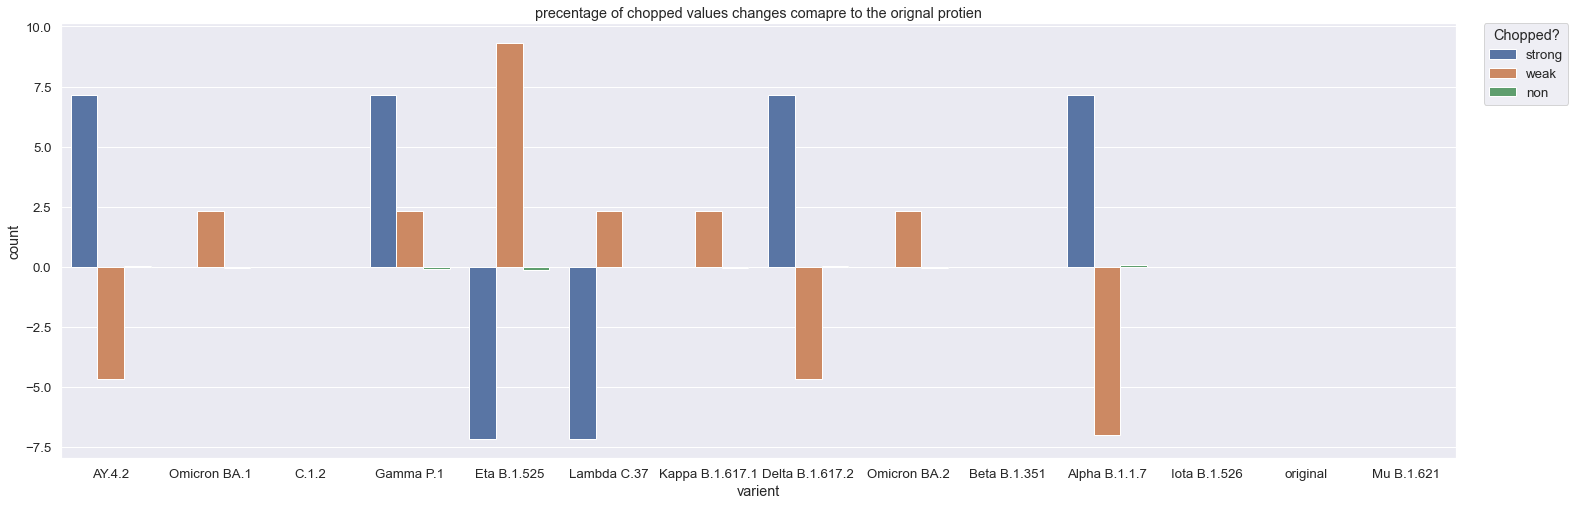

In [183]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(25,8)})
sns.set(font_scale = 1.2)
ax = sns.barplot(x="varient", y="count", hue="Chopped?", data=chopped_counter_df)

ax.set_title('precentage of binder changes comapred to the orignal protien')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Chopped?")
plt.savefig("plots/varient-binders-change.png", dpi=500, bbox_inches='tight')
